In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split



We take housing price in Brooklyn.

In [2]:
df=pd.read_csv('BK.csv')
df.head(2)

,Unnamed: 0,BOROUGH,ZIP CODE,ADDRESS,avg price,YEAR BUILT,detail_addr,lat_x,long,geometry,...,cafes5_lat,cafes5_lng,cafes5_dist,bank_addr,bank_lat,bank_lng,bank_dist,restaurants_num,cafes_num,subway_distance
0,0,Brooklyn,11203.0,1048 BROOKLYN AVE,399.900150,2008.0,"1048 Brooklyn Ave, Brooklyn, NY 11203, USA",40.648037,-73.943763,POINT (-73.94376319999999 40.6480373),...,40.655670,-73.950084,1002.060073,"4102 Church Ave, Brooklyn, NY 11203, United St...",40.651142,-73.938324,574.848533,321,9,538.209688
1,1,Brooklyn,11203.0,1439 TROY AVE,288.624788,1935.0,"1439 Troy Ave, Brooklyn, NY 11203, USA",40.637449,-73.934409,POINT (-73.9344091 40.637449),...,40.624835,-73.917812,1983.354146,"4901 Kings Hwy, Brooklyn, NY 11234, United States",40.634389,-73.928982,571.184262,193,2,1208.500333


In [4]:
# we take the following features
df_=df[['avg price','grocery distance < 500 numbers','subway_line_number < 500m',
        'hospital_distance','library_distance','mall1_dist','mall2_dist','mall3_dist',
        'police_dist','small_park_distance','mid_park_distance','big_park_distance',
        'elem_school_dist','high_school_dist','junior_high_school_dist','secondary_school_dist',
       'college_dist','bank_dist','restaurants1_dist','restaurants2_dist','restaurants3_dist',
        'restaurants4_dist','restaurants5_dist','cafes1_dist','cafes2_dist','cafes3_dist',
        'cafes4_dist','cafes5_dist']]

df_=df_.rename(columns={"avg price":"avg_price"})
df_=df_.dropna()
df_

,avg_price,grocery distance < 500 numbers,subway_line_number < 500m,hospital_distance,library_distance,mall1_dist,mall2_dist,mall3_dist,police_dist,small_park_distance,...,restaurants1_dist,restaurants2_dist,restaurants3_dist,restaurants4_dist,restaurants5_dist,cafes1_dist,cafes2_dist,cafes3_dist,cafes4_dist,cafes5_dist
0,399.900150,9,0,860.583392,1135.786772,560.610154,574.558721,954.840331,4247.351126,1054.504373,...,293.408855,299.876052,341.219286,343.232481,357.655179,665.184890,672.878269,736.604413,777.343447,1002.060073
1,288.624788,3,0,2208.085173,1134.772417,470.613482,862.469888,876.003423,3663.878543,221.599950,...,68.189197,233.265000,252.414802,299.041105,435.242887,1326.374029,1395.588886,1653.549602,1762.595687,1983.354146
2,313.517241,8,0,1619.545048,658.855648,169.256511,656.249486,956.858242,2589.099748,760.785109,...,65.254876,79.509511,191.717707,213.342979,217.368798,591.928874,1066.345801,1924.290861,1949.641150,2016.918433
3,220.000000,7,0,397.487623,1069.296769,1001.571410,1059.767685,1169.854261,4179.682208,1100.040320,...,149.199535,171.104689,210.931370,211.436318,213.191127,369.392635,588.249375,590.260959,714.511184,747.793791
4,460.296274,6,0,676.845411,837.182126,918.340756,1020.260073,1095.008590,3921.715632,798.774942,...,95.025936,160.370683,167.604007,171.410740,174.024665,675.568953,827.532029,844.935538,848.922870,1019.771724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1729,237.904348,7,0,2000.128202,974.983933,371.592999,964.342627,1102.024391,1739.575854,1054.671776,...,222.810464,259.622288,259.938360,261.017660,261.889912,1734.323809,2249.429651,2837.147512,3144.821420,4101.543506
1730,237.904348,7,0,1992.152974,992.571897,359.956276,945.485545,1119.202133,1758.917316,1069.183592,...,208.487313,279.238066,279.314979,280.159266,281.649167,1744.167150,2267.218788,2822.530910,3161.338963,4106.860615
1731,237.904348,7,0,1986.445426,1007.015974,350.624452,930.576470,1133.343956,1774.565286,1081.359395,...,198.143082,294.784890,294.919688,295.432959,297.491864,1752.719078,2281.780357,2811.271845,3174.954673,4111.786742
1732,221.261626,7,0,1937.113552,1036.951082,357.144667,874.317173,1160.908282,1815.893499,1096.883387,...,141.936229,347.907553,347.989526,349.296218,350.880217,1749.851358,2311.840376,2753.081250,3198.019953,4093.602332


In [37]:
# summary descriptive statistics
df_.describe()

,avg_price,grocery distance < 500 numbers,subway_line_number < 500m,hospital_distance,library_distance,mall1_dist,mall2_dist,mall3_dist,police_dist,small_park_distance,...,restaurants1_dist,restaurants2_dist,restaurants3_dist,restaurants4_dist,restaurants5_dist,cafes1_dist,cafes2_dist,cafes3_dist,cafes4_dist,cafes5_dist
count,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,...,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000
mean,573.160675,5.809112,1.581315,2159.428454,677.050978,963.780511,1295.750559,1546.486194,3467.851986,549.610341,...,160.491784,194.103615,222.387019,246.059872,270.496066,516.682105,792.974492,999.557778,1130.485971,1281.624175
std,437.780061,4.354317,2.363655,1438.330579,346.353778,459.073104,528.795727,591.319899,1501.656469,302.936850,...,110.672166,125.539779,142.766964,151.363930,152.062175,404.686120,577.155181,696.717391,741.800377,814.344657
min,201.886792,0.000000,0.000000,34.328689,36.897979,25.769122,115.813942,198.111524,208.197802,28.888031,...,12.787296,16.259802,17.750356,20.649418,22.459478,17.418280,31.793127,60.097760,67.358586,71.152791
25%,325.000000,2.000000,0.000000,1058.434131,437.670541,595.897001,895.291217,1105.152344,2090.750784,324.540894,...,80.046368,107.117613,128.706968,143.820296,169.584085,218.795031,375.877110,512.833512,591.695015,721.973512
50%,448.413005,5.000000,0.000000,1837.296210,630.471471,918.077719,1257.111815,1529.184468,3709.156853,510.390642,...,137.929466,167.400014,195.433780,216.985595,250.315278,417.949704,660.910366,859.347654,1000.332642,1124.200823
75%,664.723378,8.000000,3.000000,2904.792881,876.380865,1264.151083,1629.900498,1918.816291,4723.947242,727.781042,...,208.939146,251.401103,283.559406,315.691630,341.056259,694.326442,985.175237,1219.479249,1340.135996,1547.672183
max,7452.118400,23.000000,18.000000,7397.398569,2083.926436,2342.939422,2973.367159,3384.341736,6412.325339,1917.000906,...,928.762981,968.493923,1148.688716,1172.896384,1174.123362,2465.219210,3224.936027,4094.039333,4128.271281,4181.334478


In [42]:
# here just to make sure there are real many values are pretty high(which should not be treated as outliers)
test=df_.sort_values(by=['avg_price']).tail(170)
test

,avg_price,grocery distance < 500 numbers,subway_line_number < 500m,hospital_distance,library_distance,mall1_dist,mall2_dist,mall3_dist,police_dist,small_park_distance,...,restaurants1_dist,restaurants2_dist,restaurants3_dist,restaurants4_dist,restaurants5_dist,cafes1_dist,cafes2_dist,cafes3_dist,cafes4_dist,cafes5_dist
1705,1030.303030,8,3,1307.824387,832.094137,770.829921,846.712774,961.797570,1792.607544,368.740461,...,56.985558,57.446109,58.033217,58.885713,60.260893,126.431738,170.561147,201.611022,270.496963,300.192747
1185,1031.793641,10,0,2764.973275,337.550224,2156.670001,2307.127057,2416.000379,232.199788,1267.992032,...,128.940997,130.278269,130.855979,130.934392,133.519599,130.278269,858.665147,948.393671,950.796946,975.738342
535,1034.661148,15,10,6013.975361,981.364130,514.839447,1028.957461,1698.492134,5732.111218,394.681461,...,39.613986,40.233141,45.674705,50.727353,51.594339,467.325344,484.202996,488.823803,549.644419,554.000826
617,1037.792442,13,6,201.963203,227.906072,989.231732,1037.991779,1205.094150,1591.519215,671.400570,...,62.065117,62.630946,63.974636,64.902886,64.902886,62.065117,206.927445,219.322005,240.385682,299.646606
799,1042.105263,11,2,3315.137779,676.458080,1792.100197,2251.934387,2281.321273,2650.829639,539.478960,...,138.144092,138.303353,139.193323,140.391593,145.901673,162.849575,243.679816,355.609934,367.540001,490.221456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,2745.500568,2,3,360.981975,586.471545,348.160759,550.845714,827.670788,2401.066691,404.963116,...,51.676149,53.529883,56.191659,88.008812,95.920084,95.920084,103.100041,185.331359,226.858617,295.337500
828,3080.667594,16,16,1093.972408,129.577235,133.596608,174.298798,198.111524,1247.439850,513.696837,...,52.655300,64.004836,117.554894,126.012719,134.687011,208.622105,234.829103,243.618007,254.415582,305.178159
626,3150.000000,5,1,453.687209,829.379942,315.035277,455.848571,951.229348,2703.849618,622.201087,...,35.704919,38.693293,42.285506,46.341348,52.068920,52.068920,99.082287,150.394919,168.107194,171.944837
619,5335.966365,6,4,410.991253,459.445286,439.076118,579.438754,694.319925,2079.980775,152.199610,...,105.865024,148.854669,165.282098,169.287957,169.473455,148.854669,348.532636,356.638016,396.438292,398.216102


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


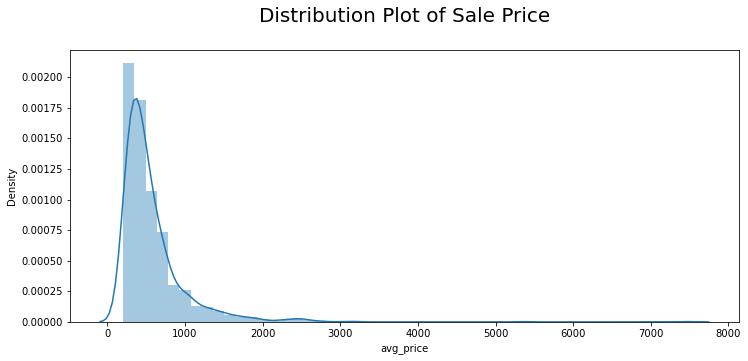

In [36]:
plt.figure(figsize = (12, 5))
sns.distplot(df_['avg_price'])
plt.title('Distribution Plot of Sale Price\n', fontsize =  20)
plt.show()

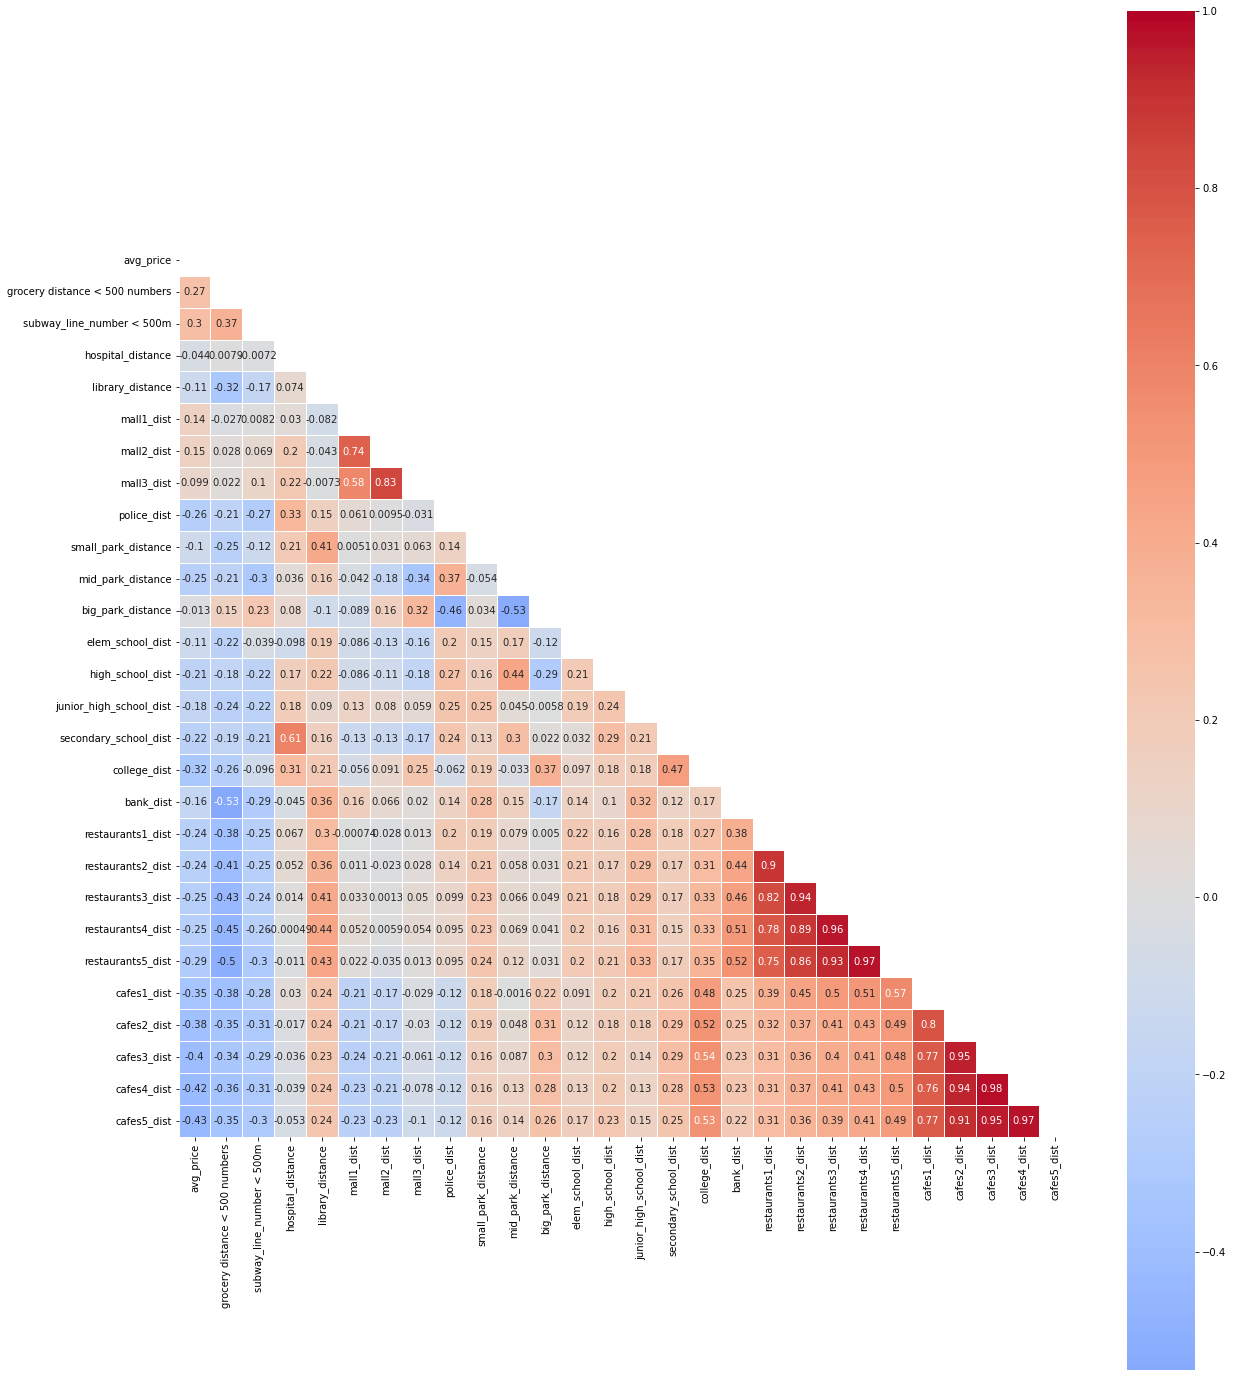

In [6]:
# correlation matrix of each features
plt.figure(figsize=(20,25))
corr=df_norm.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(df_norm.corr(), mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()

In [5]:
# data normalization before the regression
norm=df_.iloc[:,:]
df_norm=(norm - norm.mean())/norm.std()
df_norm.head()

,avg_price,grocery distance < 500 numbers,subway_line_number < 500m,hospital_distance,library_distance,mall1_dist,mall2_dist,mall3_dist,police_dist,small_park_distance,...,restaurants1_dist,restaurants2_dist,restaurants3_dist,restaurants4_dist,restaurants5_dist,cafes1_dist,cafes2_dist,cafes3_dist,cafes4_dist,cafes5_dist
0,-0.395771,0.732810,-0.669013,-0.903023,1.324472,-0.878227,-1.363838,-1.000551,0.519093,1.666664,...,1.200998,0.842541,0.832351,0.641980,0.573181,0.366958,-0.208083,-0.377418,-0.476061,-0.343299
1,-0.649952,-0.645133,-0.669013,0.033829,1.321543,-1.074267,-0.819372,-1.133875,0.130540,-1.082768,...,-0.834018,0.311944,0.210327,0.350025,1.083417,2.000790,1.044112,0.938676,0.852129,0.861711
2,-0.593091,0.503153,-0.669013,-0.375354,-0.052534,-1.730713,-1.209354,-0.997139,-0.585189,0.697092,...,-0.860532,-0.912811,-0.214821,-0.216147,-0.349379,0.185939,0.473653,1.327271,1.104280,0.902928
3,-0.806708,0.273496,-0.669013,-1.224990,1.132500,0.082320,-0.446265,-0.636934,0.474030,1.816979,...,-0.102033,-0.183200,-0.080240,-0.228744,-0.376852,-0.363960,-0.354714,-0.587465,-0.560764,-0.655534
4,-0.257811,0.043839,-0.669013,-1.030767,0.462334,-0.098982,-0.520977,-0.763508,0.302242,0.822497,...,-0.591529,-0.268703,-0.383723,-0.493176,-0.634421,0.392617,0.059876,-0.221930,-0.379567,-0.321550


# Regression models

Here we tried different regression models from sklearn and Tensorflow keras. They include ridge regression, decision tree regressor, XGB regressor, gradient boosting regressor, ada boost regressor, random forest regressor, and neural network. 

### ridge regression

In [7]:
y=df_norm.loc[:,"avg_price"]

X=df_norm.iloc[:,1:]
X=pd.get_dummies(X)

# Split data into 70% train, 30% test
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)

In [8]:
param_grid ={'alpha':np.logspace(-3, 0, 50)}

OS=[]
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = i)
    rid=linear_model.Ridge()
    gr=GridSearchCV(rid,param_grid=param_grid,cv=5)
    rs=gr.fit(X_train,y_train)
    OS.append(1-((rs.predict(X_test)-y_test)**2).mean()/y_test.var())
print(np.mean(OS))

0.340188567547984


### decision tree regressor

In [11]:
OS=[]
for i in range(1,100):    
    dt=DecisionTreeRegressor(max_depth=i)
    dt.fit(X_train,y_train)
    OS.append(dt.score(X_test,y_test)) 
print(np.mean(OS))

-0.07775283263272674


### XGBRegressor

In [12]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

In [13]:
xgb=XGBRegressor()
xgb.fit(X_train,y_train)
print('In sample R2:',xgb.score(X_train,y_train))
print('Out of sample R2:',xgb.score(X_test,y_test))

In sample R2: 0.9994919728350474
Out of sample R2: 0.3726470753146156


In [14]:
OS=[]
for i in range(1,100):    
    xgb=XGBRegressor(n_estimators=i)
    xgb.fit(X_train,y_train)
    OS.append(xgb.score(X_test,y_test)) 
print(np.mean(OS))

0.3788049055024781


### GradientBoostingRegressor

In [29]:
gbr= GradientBoostingRegressor()
gbr.fit(X_train, y_train)
print('In sample R2:',gbr.score(X_train,y_train))
print('Out of sample R2:',gbr.score(X_test,y_test))

In sample R2: 0.8869450152122268
Out of sample R2: 0.46538062280747294


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- grocery distance < 500 numbers
- subway_line_number < 500m
Feature names seen at fit time, yet now missing:
- grocery distance _ 500 numbers
- subway_line_number _ 500m

  warnings.warn(message, FutureWarning)


In [32]:
OS=[]
for i in range(1,10):    
    gbr= GradientBoostingRegressor()
    gbr.fit(X_train, y_train)
    OS.append(gbr.score(X_test,y_test)) 
print(np.mean(OS))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- grocery distance < 500 numbers
- subway_line_number < 500m
Feature names seen at fit time, yet now missing:
- grocery distance _ 500 numbers
- subway_line_number _ 500m

  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- grocery distance < 500 numbers
- subway_line_number < 500m
Feature names seen at fit time, yet now missing:
- grocery distance _ 500 numbers
- subway_line_number _ 500m

  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that wer

0.4679748707938789


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- grocery distance < 500 numbers
- subway_line_number < 500m
Feature names seen at fit time, yet now missing:
- grocery distance _ 500 numbers
- subway_line_number _ 500m

  warnings.warn(message, FutureWarning)


### AdaBoostRegressor

In [16]:
abc= AdaBoostRegressor()
abc.fit(X_train, y_train)
print('In sample R2:',abc.score(X_train,y_train))
print('Out of sample R2:',abc.score(X_test,y_test))

In sample R2: 0.6159047870897223
Out of sample R2: 0.3122466629676396


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- grocery distance < 500 numbers
- subway_line_number < 500m
Feature names seen at fit time, yet now missing:
- grocery distance _ 500 numbers
- subway_line_number _ 500m

  warnings.warn(message, FutureWarning)


In [33]:
OS=[]
for i in range(1,10):    
    abc= AdaBoostRegressor()
    abc.fit(X_train, y_train)
    OS.append(abc.score(X_test,y_test)) 
print(np.mean(OS))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- grocery distance < 500 numbers
- subway_line_number < 500m
Feature names seen at fit time, yet now missing:
- grocery distance _ 500 numbers
- subway_line_number _ 500m

  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- grocery distance < 500 numbers
- subway_line_number < 500m
Feature names seen at fit time, yet now missing:
- grocery distance _ 500 numbers
- subway_line_number _ 500m

  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that wer

0.28801909166186496


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- grocery distance < 500 numbers
- subway_line_number < 500m
Feature names seen at fit time, yet now missing:
- grocery distance _ 500 numbers
- subway_line_number _ 500m

  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- grocery distance < 500 numbers
- subway_line_number < 500m
Feature names seen at fit time, yet now missing:
- grocery distance _ 500 numbers
- subway_line_number _ 500m

  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that wer

### RandomForestRegressor

In [18]:
OS=[]
for i in range(5,20):    
    rf = RandomForestRegressor(max_depth=i)
    rf.fit(X_train, y_train)
    OS.append(rf.score(X_test,y_test)) 
print(np.mean(OS))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- grocery distance < 500 numbers
- subway_line_number < 500m
Feature names seen at fit time, yet now missing:
- grocery distance _ 500 numbers
- subway_line_number _ 500m

  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- grocery distance < 500 numbers
- subway_line_number < 500m
Feature names seen at fit time, yet now missing:
- grocery distance _ 500 numbers
- subway_line_number _ 500m

  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that wer

0.49163027534858805


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- grocery distance < 500 numbers
- subway_line_number < 500m
Feature names seen at fit time, yet now missing:
- grocery distance _ 500 numbers
- subway_line_number _ 500m

  warnings.warn(message, FutureWarning)


In [19]:
param_grid ={'max_depth':range(40,80),'n_estimators':range(5,20),'max_leaf_nodes':range(5,20)}

rf=RandomForestRegressor()
gr=GridSearchCV(rf,param_grid=param_grid)
rs=gr.fit(X_train,y_train)
print(rs.best_params_,rs.best_score_)

{'max_depth': 69, 'max_leaf_nodes': 19, 'n_estimators': 13} 0.4445659469372941


In [17]:
rf = RandomForestRegressor(n_estimators=60, min_samples_leaf=11, max_depth=11)
rf.fit(X_train, y_train)

print('In sample R2:',rf.score(X_train,y_train))
print('Out of sample R2:',rf.score(X_test,y_test))

In sample R2: 0.5934466883150041
Out of sample R2: 0.5067566418736532


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- grocery distance < 500 numbers
- subway_line_number < 500m
Feature names seen at fit time, yet now missing:
- grocery distance _ 500 numbers
- subway_line_number _ 500m

  warnings.warn(message, FutureWarning)


### Results of regression models

In [35]:
data = {'Models':['Ridge Regression', 'DecisionTreeRegressor', 'XGBRegressor',
                 'GradientBoostingRegressor', 'AdaBoostRegressor','RandomForestRegressor','Neural Network'],
        'R2':[0.340188567547984, -0.07775283263272674, 0.3788049055024781, 
              0.4679748707938789,0.28801909166186496,0.49163027534858805,-0.01504863195289019]}
df_results = pd.DataFrame(data)
df_results

,Models,R2
0,Ridge Regression,0.340189
1,DecisionTreeRegressor,-0.077753
2,XGBRegressor,0.378805
3,GradientBoostingRegressor,0.467975
4,AdaBoostRegressor,0.288019
5,RandomForestRegressor,0.491630
6,Neural Network,-0.015049


# Classification models

In [22]:
df1=df[['avg price','grocery distance < 500 numbers','subway_line_number < 500m',
        'hospital_distance','library_distance','mall1_dist','mall2_dist','mall3_dist',
        'police_dist','small_park_distance','mid_park_distance','big_park_distance',
        'elem_school_dist','high_school_dist','junior_high_school_dist','secondary_school_dist',
       'college_dist','bank_dist','restaurants1_dist','restaurants2_dist','restaurants3_dist',
        'restaurants4_dist','restaurants5_dist','cafes1_dist','cafes2_dist','cafes3_dist',
        'cafes4_dist','cafes5_dist']]

df1=df1.rename(columns={"avg price":"avg_price"})
df1=df1.dropna()
df1

,avg_price,grocery distance < 500 numbers,subway_line_number < 500m,hospital_distance,library_distance,mall1_dist,mall2_dist,mall3_dist,police_dist,small_park_distance,...,restaurants1_dist,restaurants2_dist,restaurants3_dist,restaurants4_dist,restaurants5_dist,cafes1_dist,cafes2_dist,cafes3_dist,cafes4_dist,cafes5_dist
0,399.900150,9,0,860.583392,1135.786772,560.610154,574.558721,954.840331,4247.351126,1054.504373,...,293.408855,299.876052,341.219286,343.232481,357.655179,665.184890,672.878269,736.604413,777.343447,1002.060073
1,288.624788,3,0,2208.085173,1134.772417,470.613482,862.469888,876.003423,3663.878543,221.599950,...,68.189197,233.265000,252.414802,299.041105,435.242887,1326.374029,1395.588886,1653.549602,1762.595687,1983.354146
2,313.517241,8,0,1619.545048,658.855648,169.256511,656.249486,956.858242,2589.099748,760.785109,...,65.254876,79.509511,191.717707,213.342979,217.368798,591.928874,1066.345801,1924.290861,1949.641150,2016.918433
3,220.000000,7,0,397.487623,1069.296769,1001.571410,1059.767685,1169.854261,4179.682208,1100.040320,...,149.199535,171.104689,210.931370,211.436318,213.191127,369.392635,588.249375,590.260959,714.511184,747.793791
4,460.296274,6,0,676.845411,837.182126,918.340756,1020.260073,1095.008590,3921.715632,798.774942,...,95.025936,160.370683,167.604007,171.410740,174.024665,675.568953,827.532029,844.935538,848.922870,1019.771724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1729,237.904348,7,0,2000.128202,974.983933,371.592999,964.342627,1102.024391,1739.575854,1054.671776,...,222.810464,259.622288,259.938360,261.017660,261.889912,1734.323809,2249.429651,2837.147512,3144.821420,4101.543506
1730,237.904348,7,0,1992.152974,992.571897,359.956276,945.485545,1119.202133,1758.917316,1069.183592,...,208.487313,279.238066,279.314979,280.159266,281.649167,1744.167150,2267.218788,2822.530910,3161.338963,4106.860615
1731,237.904348,7,0,1986.445426,1007.015974,350.624452,930.576470,1133.343956,1774.565286,1081.359395,...,198.143082,294.784890,294.919688,295.432959,297.491864,1752.719078,2281.780357,2811.271845,3174.954673,4111.786742
1732,221.261626,7,0,1937.113552,1036.951082,357.144667,874.317173,1160.908282,1815.893499,1096.883387,...,141.936229,347.907553,347.989526,349.296218,350.880217,1749.851358,2311.840376,2753.081250,3198.019953,4093.602332


In [23]:
df1.describe()

,avg_price,grocery distance < 500 numbers,subway_line_number < 500m,hospital_distance,library_distance,mall1_dist,mall2_dist,mall3_dist,police_dist,small_park_distance,...,restaurants1_dist,restaurants2_dist,restaurants3_dist,restaurants4_dist,restaurants5_dist,cafes1_dist,cafes2_dist,cafes3_dist,cafes4_dist,cafes5_dist
count,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,...,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000
mean,573.160675,5.809112,1.581315,2159.428454,677.050978,963.780511,1295.750559,1546.486194,3467.851986,549.610341,...,160.491784,194.103615,222.387019,246.059872,270.496066,516.682105,792.974492,999.557778,1130.485971,1281.624175
std,437.780061,4.354317,2.363655,1438.330579,346.353778,459.073104,528.795727,591.319899,1501.656469,302.936850,...,110.672166,125.539779,142.766964,151.363930,152.062175,404.686120,577.155181,696.717391,741.800377,814.344657
min,201.886792,0.000000,0.000000,34.328689,36.897979,25.769122,115.813942,198.111524,208.197802,28.888031,...,12.787296,16.259802,17.750356,20.649418,22.459478,17.418280,31.793127,60.097760,67.358586,71.152791
25%,325.000000,2.000000,0.000000,1058.434131,437.670541,595.897001,895.291217,1105.152344,2090.750784,324.540894,...,80.046368,107.117613,128.706968,143.820296,169.584085,218.795031,375.877110,512.833512,591.695015,721.973512
50%,448.413005,5.000000,0.000000,1837.296210,630.471471,918.077719,1257.111815,1529.184468,3709.156853,510.390642,...,137.929466,167.400014,195.433780,216.985595,250.315278,417.949704,660.910366,859.347654,1000.332642,1124.200823
75%,664.723378,8.000000,3.000000,2904.792881,876.380865,1264.151083,1629.900498,1918.816291,4723.947242,727.781042,...,208.939146,251.401103,283.559406,315.691630,341.056259,694.326442,985.175237,1219.479249,1340.135996,1547.672183
max,7452.118400,23.000000,18.000000,7397.398569,2083.926436,2342.939422,2973.367159,3384.341736,6412.325339,1917.000906,...,928.762981,968.493923,1148.688716,1172.896384,1174.123362,2465.219210,3224.936027,4094.039333,4128.271281,4181.334478


In [27]:
# manually divide the price into 4 levels according to the distribution plot and quantile values
df1.loc[((df1.avg_price < 325) & (df1.avg_price > 200)), 'price_level'] = 'low'
df1.loc[((df1.avg_price < 665) & (df1.avg_price > 325)), 'price_level'] = 'medium'
df1.loc[((df1.avg_price < 1030) & (df1.avg_price > 665)), 'price_level'] = 'high'
df1.loc[((df1.avg_price > 1030)), 'price_level'] = 'veryhigh'

In [28]:
df1.head()

,avg_price,grocery distance < 500 numbers,subway_line_number < 500m,hospital_distance,library_distance,mall1_dist,mall2_dist,mall3_dist,police_dist,small_park_distance,...,restaurants2_dist,restaurants3_dist,restaurants4_dist,restaurants5_dist,cafes1_dist,cafes2_dist,cafes3_dist,cafes4_dist,cafes5_dist,price_level
0,399.900150,9,0,860.583392,1135.786772,560.610154,574.558721,954.840331,4247.351126,1054.504373,...,299.876052,341.219286,343.232481,357.655179,665.184890,672.878269,736.604413,777.343447,1002.060073,medium
1,288.624788,3,0,2208.085173,1134.772417,470.613482,862.469888,876.003423,3663.878543,221.599950,...,233.265000,252.414802,299.041105,435.242887,1326.374029,1395.588886,1653.549602,1762.595687,1983.354146,low
2,313.517241,8,0,1619.545048,658.855648,169.256511,656.249486,956.858242,2589.099748,760.785109,...,79.509511,191.717707,213.342979,217.368798,591.928874,1066.345801,1924.290861,1949.641150,2016.918433,low
3,220.000000,7,0,397.487623,1069.296769,1001.571410,1059.767685,1169.854261,4179.682208,1100.040320,...,171.104689,210.931370,211.436318,213.191127,369.392635,588.249375,590.260959,714.511184,747.793791,low
4,460.296274,6,0,676.845411,837.182126,918.340756,1020.260073,1095.008590,3921.715632,798.774942,...,160.370683,167.604007,171.410740,174.024665,675.568953,827.532029,844.935538,848.922870,1019.771724,medium


In [30]:
y=df1.loc[:,"price_level"]

X=df1.iloc[:,1:-1]
X=pd.get_dummies(X)

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)

### DecisionTreeClassifier

In [31]:
OS=[]
for i in range(1,11):    
    dt=DecisionTreeClassifier(criterion='entropy', max_depth=i)
    dt.fit(X_train,y_train)
    OS.append(dt.score(X_test,y_test)) 
print(np.mean(OS))

0.5769673704414587


In [33]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

,variables,importance
26,cafes5_dist,0.347783
24,cafes3_dist,0.168299
12,high_school_dist,0.106148
15,college_dist,0.084552
10,big_park_distance,0.050609


In [45]:
from sklearn import tree

dtc=DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=10)
dtc.fit(X_test,y_test)

print(tree.export_graphviz(dtc,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=dtc.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\","))

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="cafes5_dist <= 1126.458, samples = 521, value = [87, 132, 249, 53], class = medium", fillcolor="#c3e2f7"] ;
1 [label="police_dist <= 2822.835, samples = 269, value = [72, 17, 127, 53], class = medium", fillcolor="#c8e4f8"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="samples = 133, value = [38, 3, 44, 48], class = veryhigh", fillcolor="#fdf6fe"] ;
1 -> 2 ;
3 [label="samples = 136, value = [34, 14, 83, 5], class = medium", fillcolor="#a0d0f3"] ;
1 -> 3 ;
4 [label="high_school_dist <= 1205.89, samples = 252, value = [15, 115, 122, 0], class = medium", fillcolor="#f5fafe"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="samples = 154, value = [12, 43, 99, 0], class = medium", fillcolor="#9bcef2"] ;
4 -> 5 ;
6 [label="samples = 98, value = [3, 72, 23, 0], class = low", fillcolor="#87ee7e"] ;
4 -> 6 ;

### RandomForestClassifier

In [34]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print('In sample accuracy:',rf.score(X_train,y_train))
print('Out of sample accuracy:',rf.score(X_test,y_test))

In sample accuracy: 1.0
Out of sample accuracy: 0.6314779270633397


In [35]:
param_grid ={'max_depth':range(1,10),'n_estimators':range(1,10),'max_leaf_nodes':range(2,10)}

rf=RandomForestClassifier(criterion='entropy')
gr=GridSearchCV(rf,param_grid=param_grid,scoring='accuracy')
rs=gr.fit(X_train,y_train)
print(rs.best_params_,rs.best_score_)

{'max_depth': 9, 'max_leaf_nodes': 9, 'n_estimators': 9} 0.633153079617726


In [36]:
rf = RandomForestClassifier(max_depth=4, max_leaf_nodes=7, n_estimators=3)
rf.fit(X_train, y_train)
Feature_importance=pd.DataFrame([list(X_train.columns),list(rf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

,variables,importance
24,cafes3_dist,0.235594
26,cafes5_dist,0.153578
12,high_school_dist,0.142146
15,college_dist,0.108707
4,mall1_dist,0.083052


### Results of classification models

In [38]:
data2 = {'Models':['DecisionTreeClassifier', 'RandomForestClassifier'],
        'Accuracy':[0.5769673704414587, 0.633153079617726]}
classifier_results = pd.DataFrame(data2)
classifier_results

,Models,Accuracy
0,DecisionTreeClassifier,0.576967
1,RandomForestClassifier,0.633153
